# BMI 500
Dynamic Time Warping (DTW) is a technique used to measure the similarity between
two time series, even if they vary in time or speed. Unlike traditional distance metrics
like Euclidean distance, which requires the time points to be aligned, DTW can handle
cases where one time series is stretched or compressed relative to another. Write a Python
code to calculate the Euclidean distance and DTW for the the following time series:
Time Series 1: 3 , 2 , 1 , 3 , 2 , 1 , 4 , 3 , 2 , 1 , 2 , 3 , 2 , 1
Time Series 2: 1 , 2 , 3 , 2 , 1 , 3 , 4 , 2 , 1 , 2 , 1 , 3 , 2 , 1
Compare the two methods based on the results




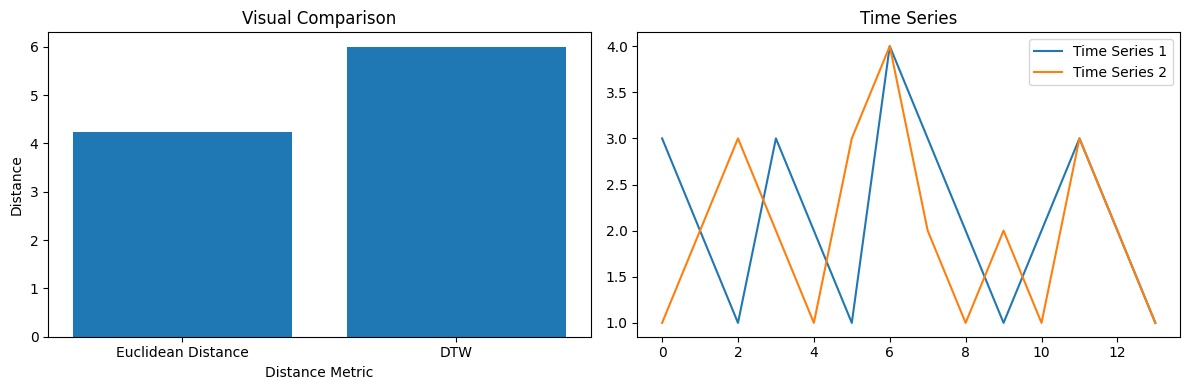

In [12]:
#number 2
import numpy as np
import matplotlib.pyplot as plt


#function to calculate Euclidean Distance
def eucli_dist(series1, series2):
    ED = np.sqrt(np.sum((np.array(series1) - np.array(series2)) ** 2))
    return ED

#function to calculate dtw
def dtw(series1, series2):
    n = len(series1)
    m = len(series2)

    matrix = np.zeros((n+1,m+1))
    #set first column to infinity
    matrix[1:,0] = np.inf
    #set first row to infinity
    matrix[0, 1:] = np.inf

    #fill up the matrix using nested for loop
    for i in range(1, n+1):
        for j in range(1, m+1):
            diff = abs(series1[i-1] - series2[j-1])
            matrix[i,j] = diff + min(matrix[i-1,j], matrix[i,j-1], matrix[i-1,j-1])
    return matrix[n, m]        

#Given data
series1 = [3, 2, 1, 3, 2, 1, 4, 3, 2, 1, 2, 3, 2, 1]
series2 = [1, 2, 3, 2, 1, 3, 4, 2, 1, 2, 1, 3, 2, 1]

# Calculate the euclidean distance
euclidean_distance = eucli_dist(series1, series2)

# Calculate the DTW 
DTW = dtw(series1, series2)

# Plot graphs to compare.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(series1, label="Time Series 1")
plt.plot(series2, label="Time Series 2")
plt.legend()
plt.title("Time Series")

plt.subplot(1, 2, 1)
plt.bar(["Euclidean Distance", "DTW"], [euclidean_distance, DTW])
plt.xlabel("Distance Metric")
plt.ylabel("Distance")
plt.title("Visual Comparison")

plt.tight_layout()
plt.show()


